In [37]:
# Import torch and matplotlib

import torch
from torch import nn

import math
import matplotlib.pyplot as plt


In [38]:
# Use 42 as random seed to initialize rand num generator to initialize nn weights
torch.manual_seed(42)

In [39]:
X_len = 1024
X_train = torch.zeros((X_len, 2)) # 1024 samples and 2 features

# store rand values in the interval from 0 to 2pi
X_train[:, 0] = 2 * math.pi * torch.rand(X_len) # x1 = 2pi*x1(rand-i)(in range 0 to 1, deal with proba)
X_train[:, 1] = torch.asin(X_train[:, 0]) # x2 = sin(x1)

# create tensor for labels y
y_train = torch.zeros(X_len) 
train_set = [(X_train[i], y_train[i]) for i in range(X_len)]

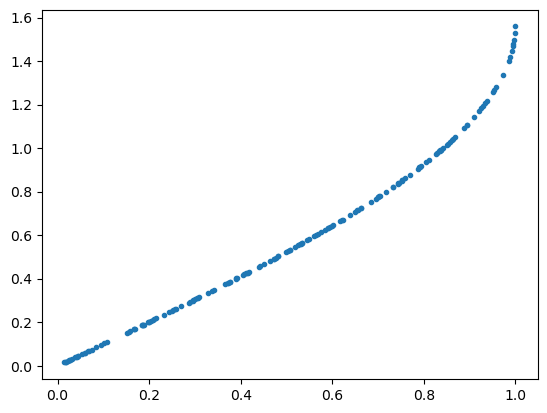

In [40]:
plt.plot(X_train[:, 0], X_train[:, 1], ".")

In [36]:
# Create PyTorch data loader
batch_size = 32

# This train loader will shuffle data from the training set and return batches of 32 samples that we'll use to train the nn
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True)

In [ ]:
# Creating the class for the discriminator

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
         # This architecture is designed for binary classification tasks, with the model outputting a single probability value between 0 and 1.
        self.model = nn.Sequential(
            
        # HLayer 1 --> Linear layer, input size = 2, output size = 256, activation func = ReLU, regularization with Dropout rate 0.3
        nn.Linear(2, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        
        # HLayer 2 --> Linear layer, input size = 256, output size = 128, activation func = ReLU, regularization with Dropout rate 0.3
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        
        # HLayer 3 --> Linear layer, input size = 128, output size = 64, activation func = ReLU, regularization with Dropout rate 0.3
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.3),
        
        # Output layer --> Out layer, input size = 64, output size = 1, activation func = Sigmoid
        nn.Linear(64, 1),
        nn.Sigmoid(),
        )